In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.pandas.set_option('display.max_columns',None)
df = pd.read_csv('Data/house_data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis

In [4]:
features_na = [x for x in df.columns if df[x].isnull().sum() > 1]

for features in features_na:
    print(features, np.round(df[features].isnull().mean(),4), '% missing values') 

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


In [5]:
numerical_features = [x for x in df.columns if df[x].dtypes != 'O']

for x in numerical_features:
    print(x)
    
len(numerical_features)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


38

In [6]:
date_features = [x for x in numerical_features if 'Year' in x or 'Yr' in x]
date_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [7]:
for x in date_features:
    print(x,df[x].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

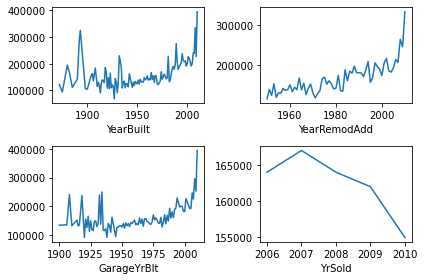

In [8]:
plt.subplot(2,2,1)
df.groupby(df.YearBuilt)['SalePrice'].median().plot()
plt.subplot(2,2,2)
df.groupby(df.YearRemodAdd)['SalePrice'].median().plot()
plt.subplot(2,2,3)
df.groupby(df.GarageYrBlt)['SalePrice'].median().plot()
plt.subplot(2,2,4)
df.groupby(df.YrSold)['SalePrice'].median().plot()
plt.tight_layout()

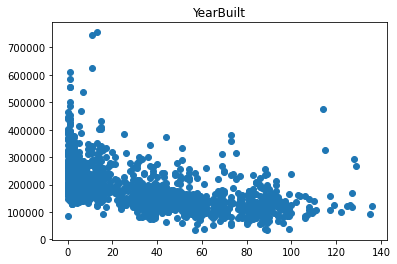

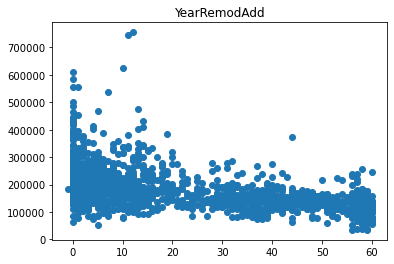

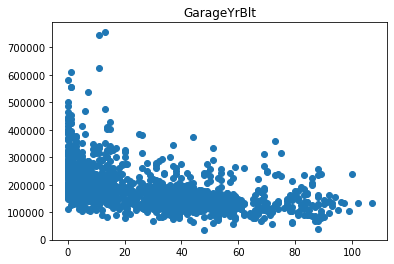

In [9]:
for feature in date_features:
    
    if feature != 'YrSold':        
        data = df.copy()
        data[feature] = df['YrSold'] - df[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()

In [10]:
discrete_features = [x for x in numerical_features if len(df[x].unique()) < 25 and x not in date_features + ['Id']]
print(discrete_features)
len(discrete_features)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


17

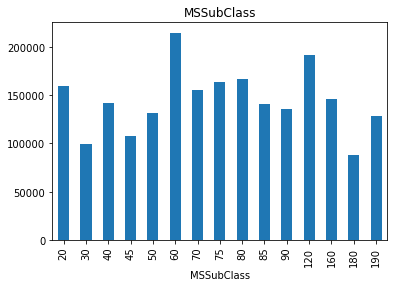

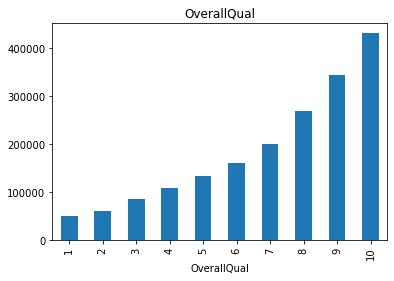

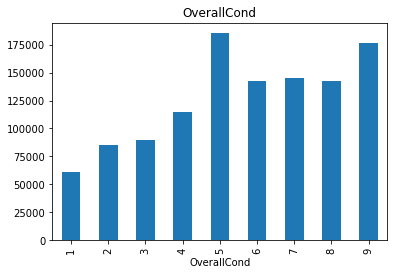

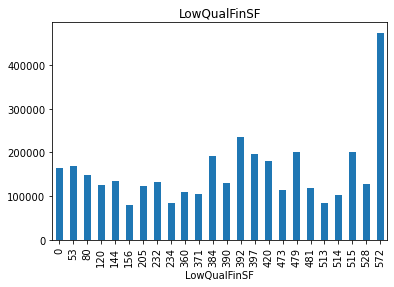

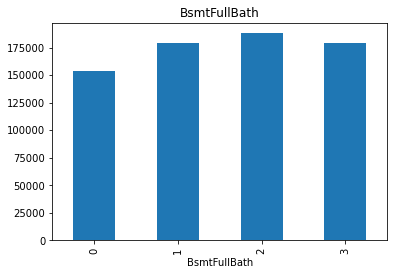

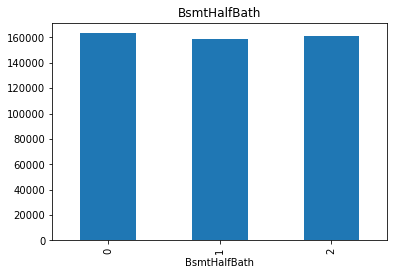

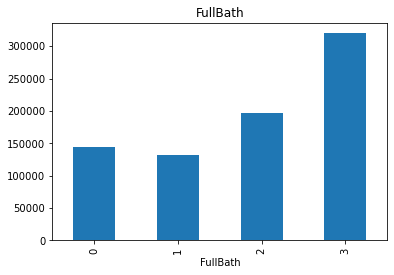

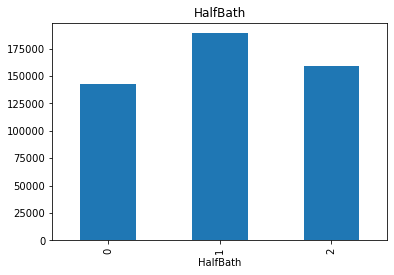

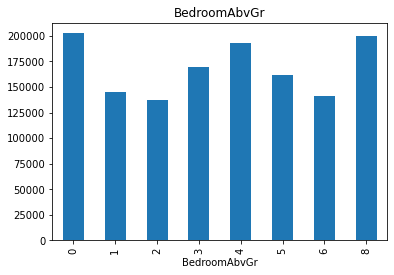

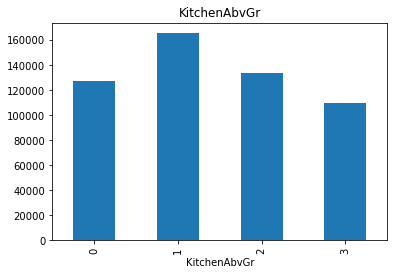

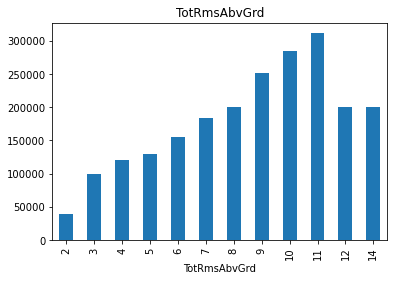

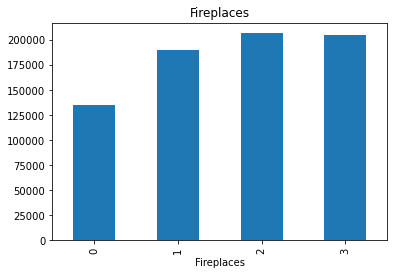

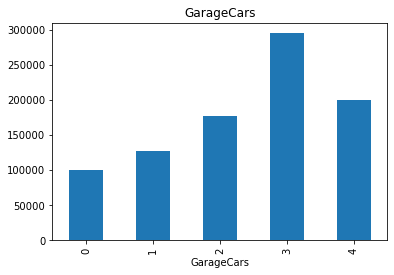

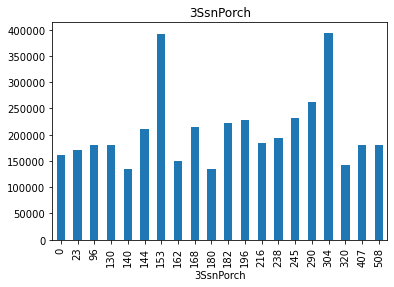

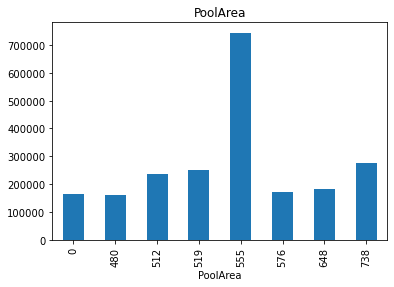

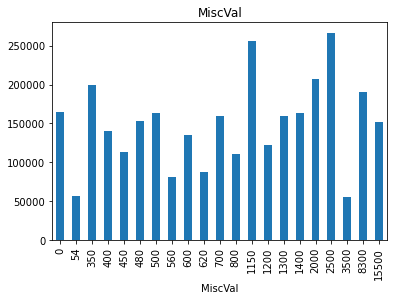

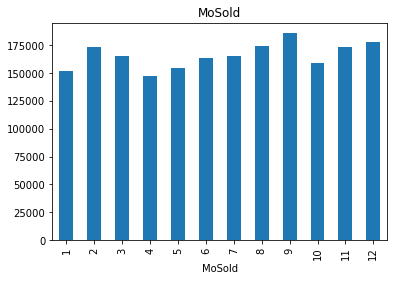

In [11]:
for features in discrete_features:
    data = df.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()

In [12]:
continuous_features = [x for x in numerical_features if x not in discrete_features + date_features + ['Id']]
print(continuous_features)
len(continuous_features)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


16

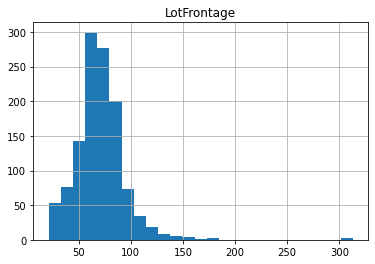

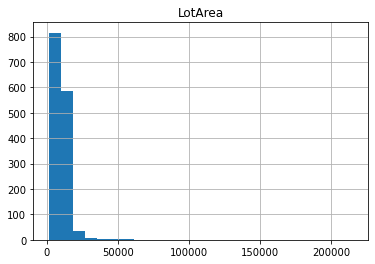

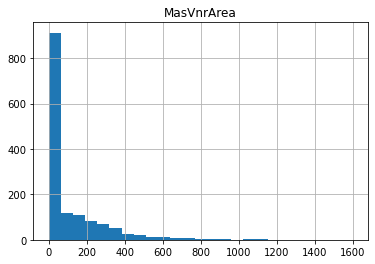

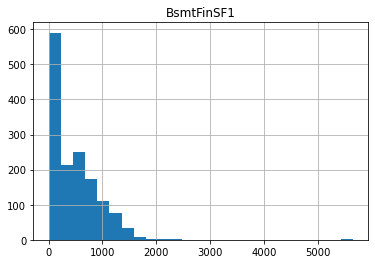

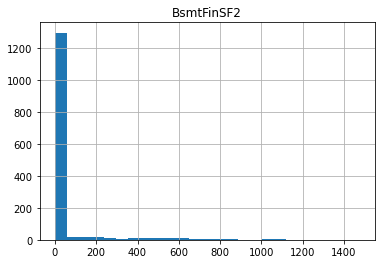

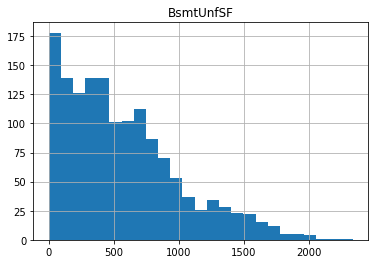

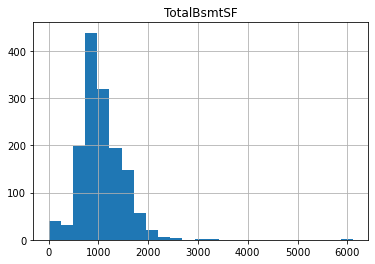

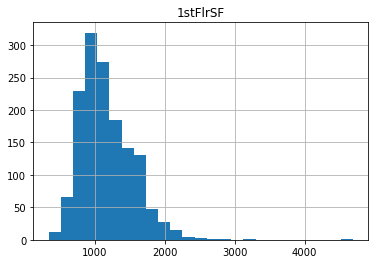

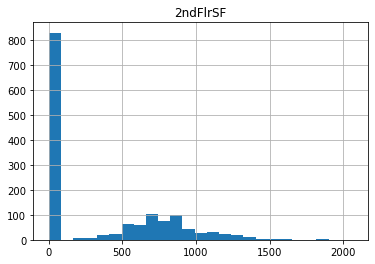

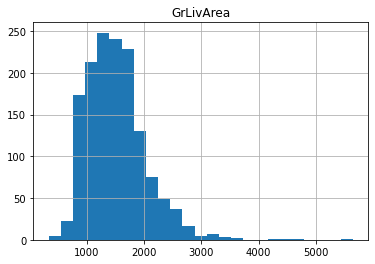

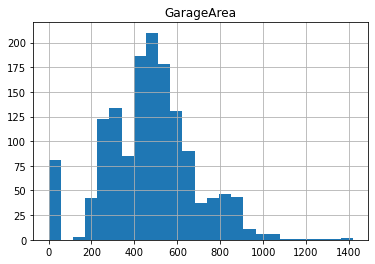

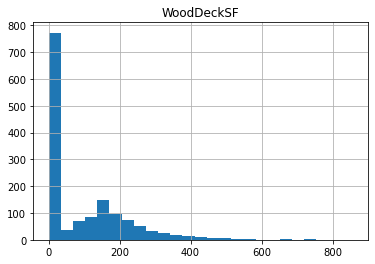

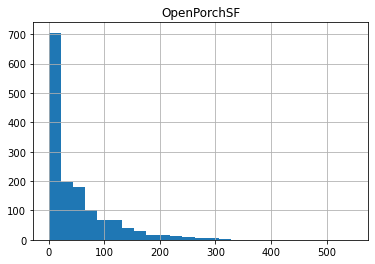

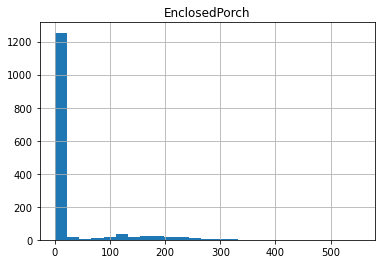

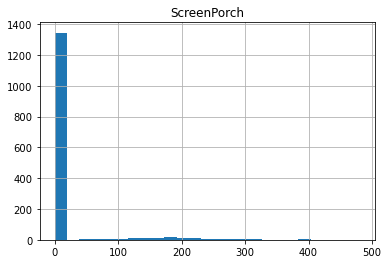

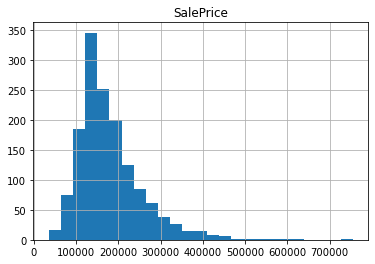

In [13]:
for feature in continuous_features:
    data = data.copy()
    data[feature].hist(bins=25)
    plt.title(feature)
    plt.show()

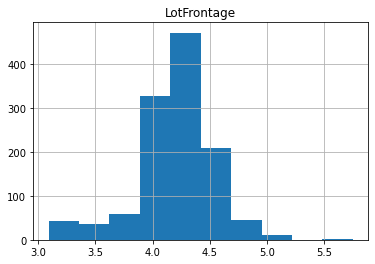

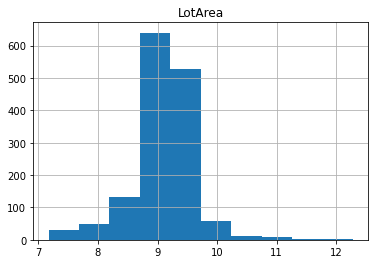

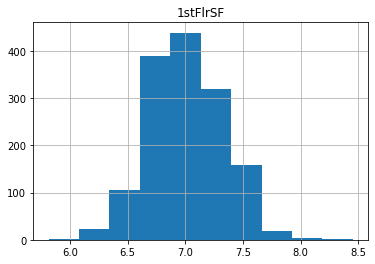

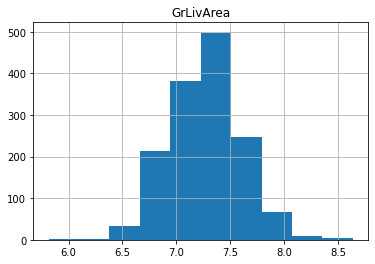

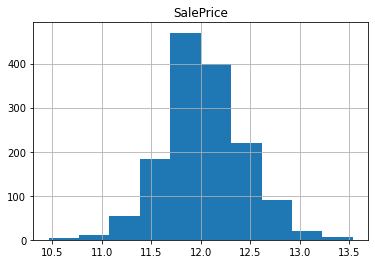

In [14]:
for feature in continuous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass 
    else :
        data[feature]=np.log(data[feature] + 1)
        data[feature].hist()
        plt.title(feature)
        plt.show()
    

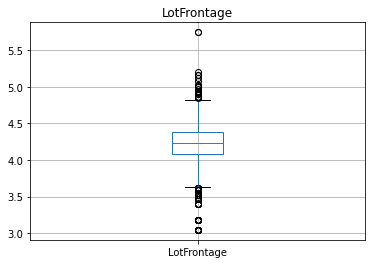

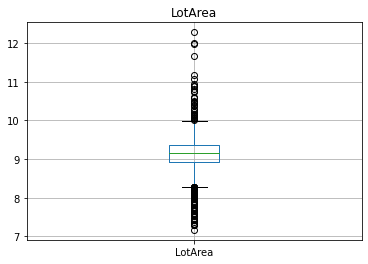

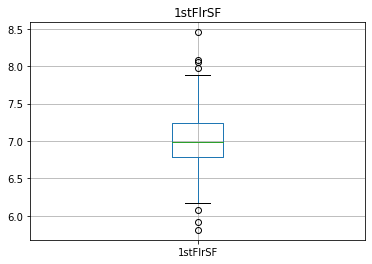

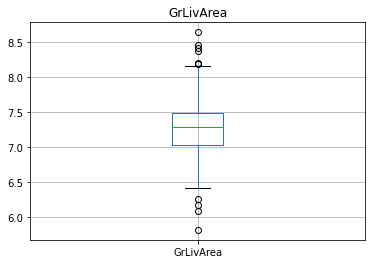

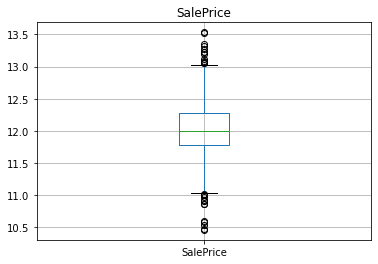

In [15]:
for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.show()

In [16]:
categorical_features = [features for features in df.columns if df[features].dtypes == 'O']
print('The total number of categorical features in dataset are ',len(categorical_features))

The total number of categorical features in dataset are  43


In [17]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

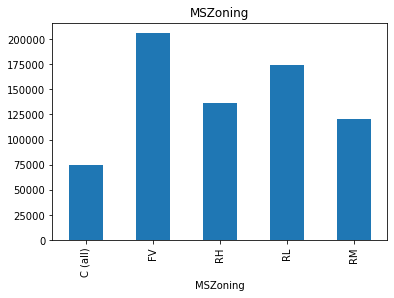

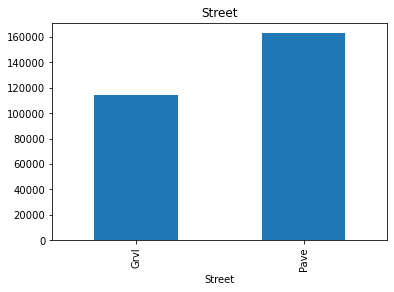

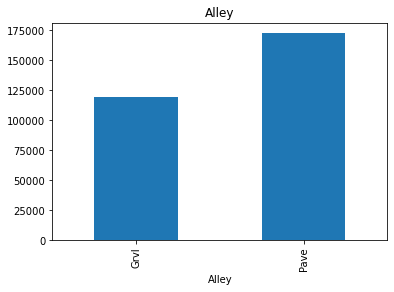

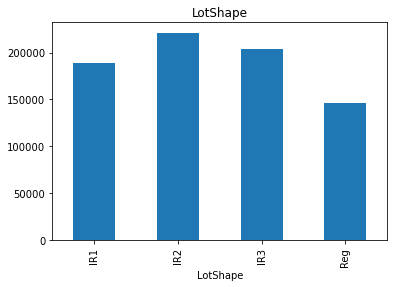

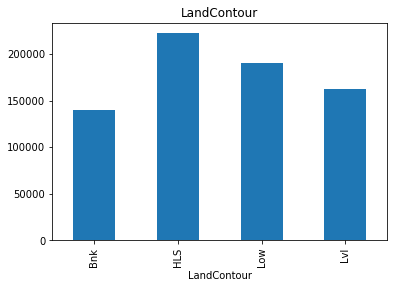

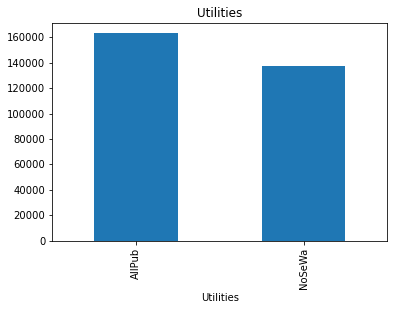

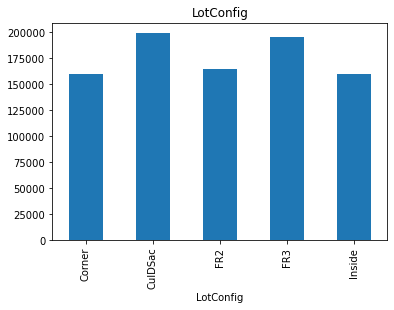

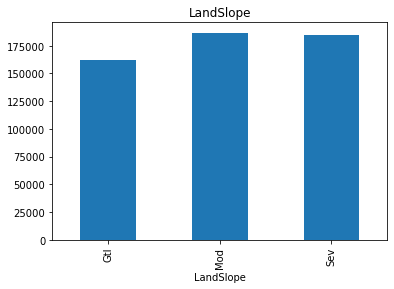

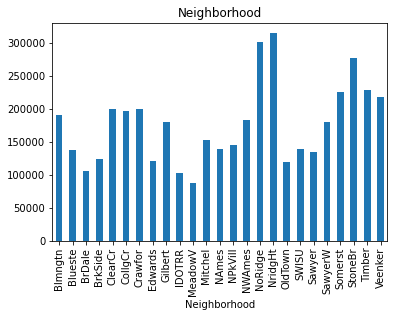

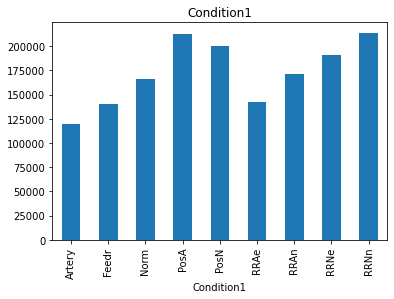

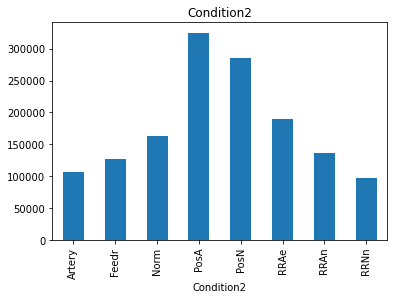

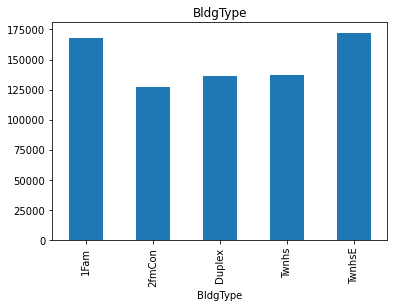

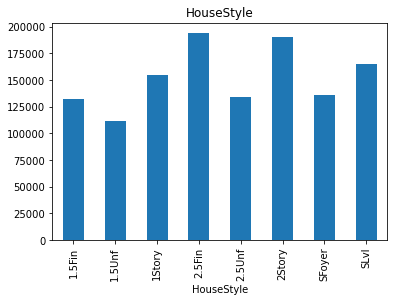

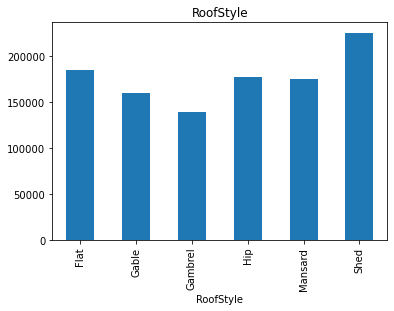

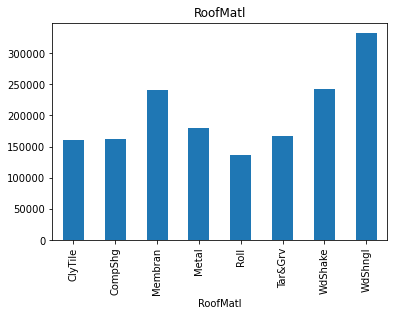

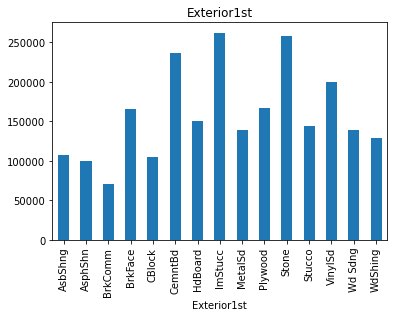

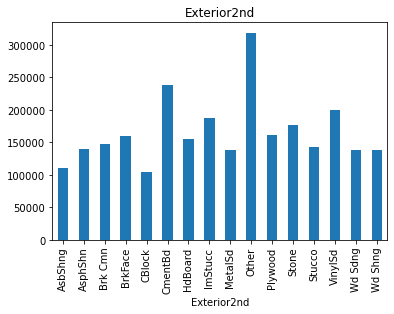

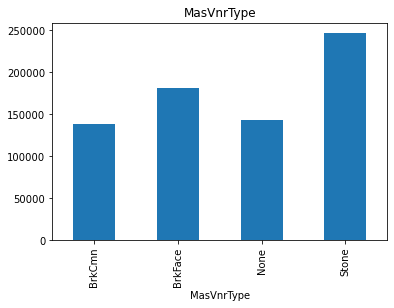

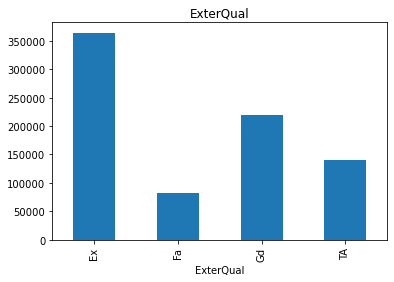

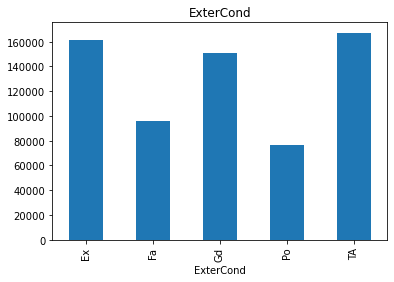

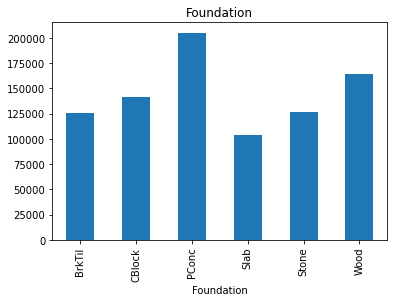

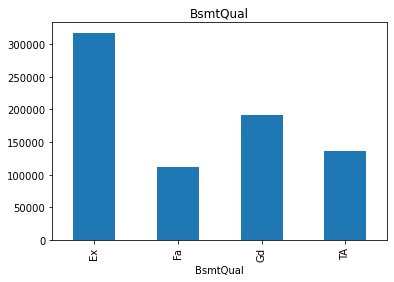

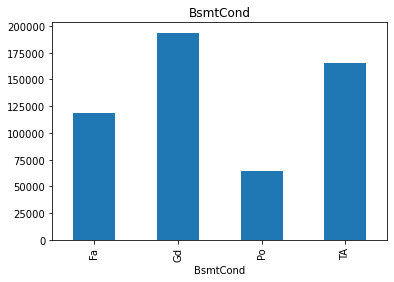

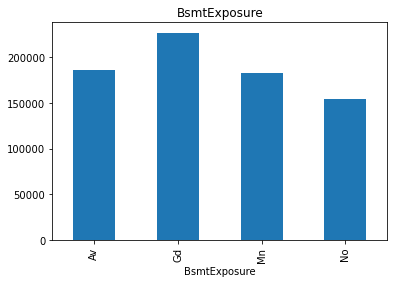

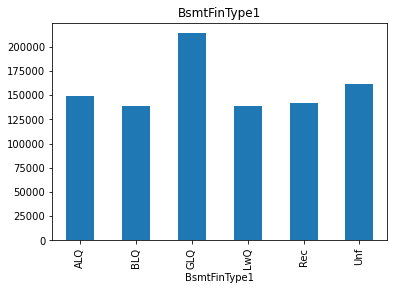

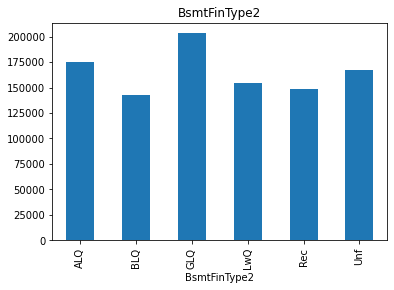

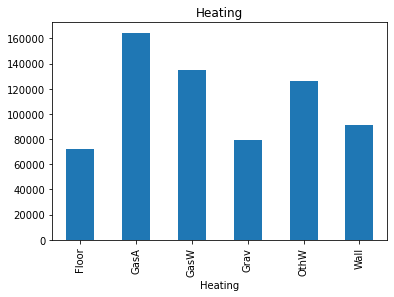

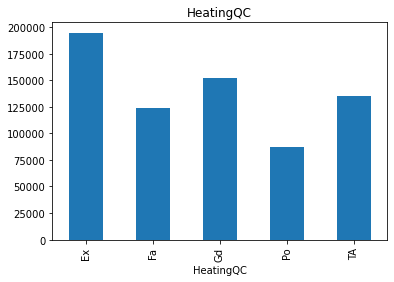

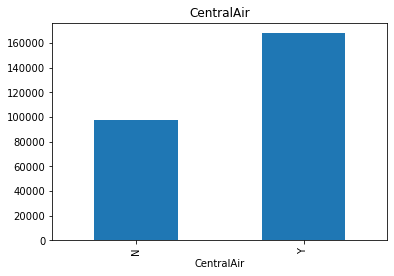

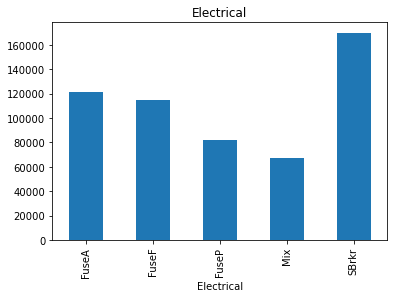

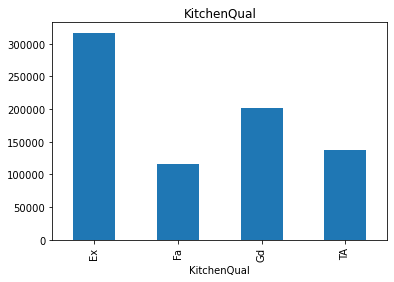

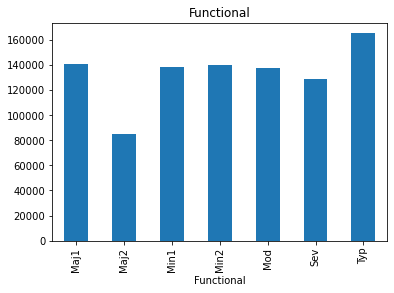

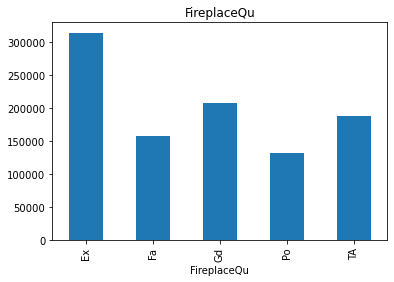

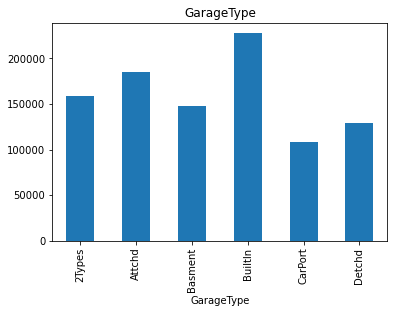

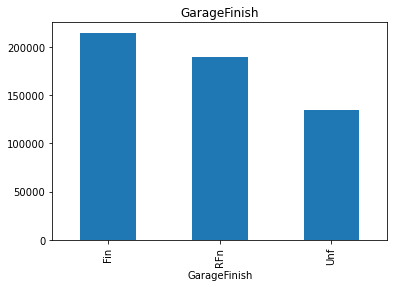

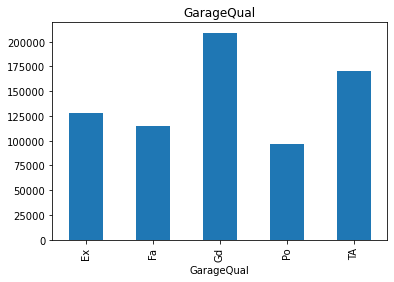

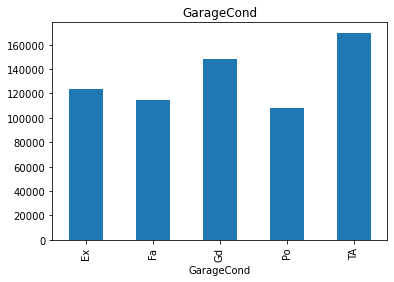

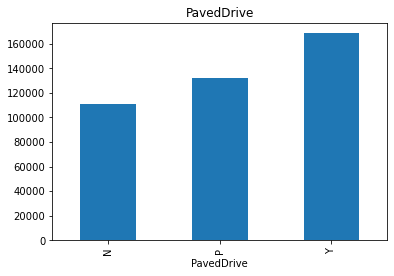

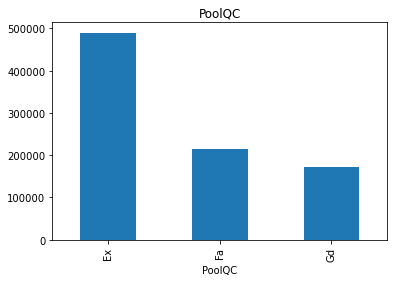

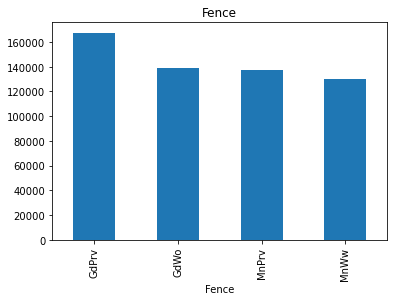

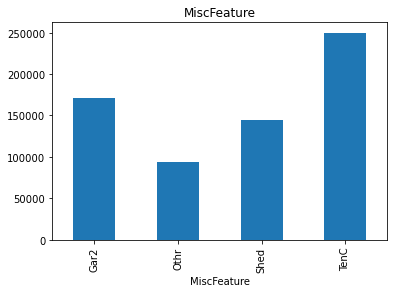

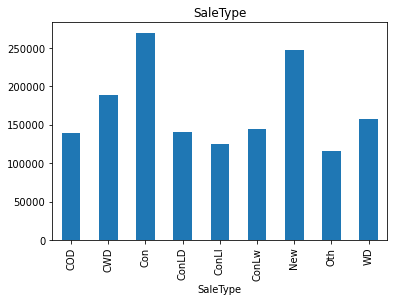

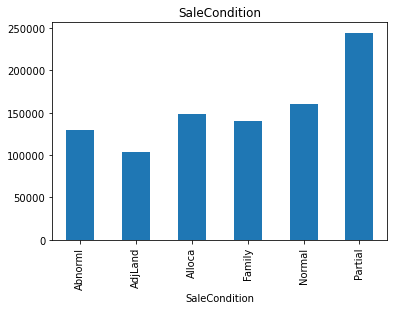

In [18]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

## Feature Engineering

In [19]:
features_nan = [features for features in df.columns if df[features].isnull().sum() > 1 and df[features].dtypes == 'O']

for features in features_nan:
    print('{} : {} % missing values'.format(features,np.round(df[features].isnull().mean(),4)))

Alley : 0.9377 % missing values
MasVnrType : 0.0055 % missing values
BsmtQual : 0.0253 % missing values
BsmtCond : 0.0253 % missing values
BsmtExposure : 0.026 % missing values
BsmtFinType1 : 0.0253 % missing values
BsmtFinType2 : 0.026 % missing values
FireplaceQu : 0.4726 % missing values
GarageType : 0.0555 % missing values
GarageFinish : 0.0555 % missing values
GarageQual : 0.0555 % missing values
GarageCond : 0.0555 % missing values
PoolQC : 0.9952 % missing values
Fence : 0.8075 % missing values
MiscFeature : 0.963 % missing values


In [20]:
def replace_cat_features(df,features):
    data = df.copy()
    data[features_nan] = data[features_nan].fillna('Missing')
    return data
df = replace_cat_features(df,features_nan)

In [21]:
df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [22]:
numerical_features_nan = [features for features in df.columns if df[features].isnull().sum() > 1 and df[features].dtypes != 'O']

for features in numerical_features_nan:
    print('{} : {} % missing values'.format(features,np.round(df[features].isnull().mean(),4)))

LotFrontage : 0.1774 % missing values
MasVnrArea : 0.0055 % missing values
GarageYrBlt : 0.0555 % missing values


In [23]:
for features in numerical_features_nan:
    median_val = df[features].median()
    df[features+'nan']=np.where(df[features].isnull(),1,0)
    df[features].fillna(median_val,inplace=True)
    
df[numerical_features_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
for feature in continuous_features:
    if 0 in df[feature].unique():
        pass
    else:
        IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
        lower_bridge=df[feature].quantile(0.25)-(IQR*1.5)
        upper_bridge=df[feature].quantile(0.75)+(IQR*1.5)
        df.loc[df[feature] >= upper_bridge] = upper_bridge
        
        df.boxplot(column=feature)
        plt.title(feature)
        plt.show()

In [25]:
for features in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df[features] = df['YrSold'] - df[features]

In [ ]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df[feature]=np.log(df[feature])
df.head()

In [26]:
for features in categorical_features:
    temp = df.groupby(features)['SalePrice'].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[features] = np.where(df[features].isin(temp_df),df[features],'Rare')

In [ ]:
df['BsmtExposure'].unique()

In [ ]:
df['BsmtExposure'].unique()

In [ ]:
df['KitchenQual'].unique()

In [ ]:
df['KitchenQual'].unique()

In [ ]:
df['FireplaceQu'].unique()

In [ ]:
df['FireplaceQu'].unique()

In [ ]:
df['GarageType'].unique()

In [ ]:
df['GarageType'].unique()

In [ ]:
df['GarageFinish'].unique()

In [ ]:
df['GarageFinish'].unique()

In [ ]:
df['MSZoning'].unique()

In [ ]:
df['Neighborhood'].unique()
#NPkVill #Veenker

In [ ]:
df['Neighborhood'].unique()

In [27]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [ ]:
scaling_feature=[feature for feature in df.columns if feature not in ['Id','SalePrice'] ]
len(scaling_feature)

In [28]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,65.0,8450,1,2,0,1,1,0,0,15,4,1,4,5,7,5,5,5,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,208500,0,0,0
1,2,20,3,80.0,9600,1,2,0,1,1,1,0,12,1,1,4,4,6,8,31,31,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,1262,0,0,1262,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,181500,0,0,0
2,3,60,3,68.0,11250,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7,6,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,223500,0,0,0
3,4,70,3,60.0,9550,1,2,1,1,1,2,0,16,4,1,4,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,140000,0,0,0
4,5,60,3,84.0,14260,1,2,1,1,1,1,0,22,4,1,4,5,8,5,8,8,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,250000,0,0,0


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[scaling_feature])

In [ ]:
scaler.transform(df[scaling_feature])

In [ ]:
data = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [ ]:
data.head()

In [ ]:
data.to_csv("scaled_house.csv",index=False)

## Feature Selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('scaled_house.csv')
data.head()

In [ ]:
y_train=data['SalePrice']
X_train=data.drop(['Id','SalePrice'],axis=1)

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.015, random_state=42)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

In [ ]:
feature_sel_model.get_support()

In [ ]:
selected_features = X_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_features)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

In [ ]:
selected_features

In [ ]:
data.columns

In [ ]:
df=data[selected_features]
df.head()

In [ ]:
df = pd.concat([data['SalePrice'].reset_index(drop=True),df],axis=1)

In [ ]:
df.head()

In [29]:
selected_features = ['Neighborhood', 'OverallQual', 'YearRemodAdd', 'BsmtExposure',
       'GrLivArea', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars','SalePrice']

In [30]:
df = df[selected_features]
df.head()

,Neighborhood,OverallQual,YearRemodAdd,BsmtExposure,GrLivArea,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageCars,SalePrice
0,15,7,5,1,1710,2,1,4,2,2,208500
1,12,6,31,4,1262,1,3,4,2,2,181500
2,15,7,6,2,1786,2,3,4,2,2,223500
3,16,7,36,1,1717,2,4,2,1,3,140000
4,22,8,8,3,2198,2,3,4,2,3,250000


In [31]:
df.to_csv('final_house.csv',index=False)

In [32]:
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [34]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((1314, 10), (146, 10), (1314,), (146,))

## Model Building

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = linReg.predict(X_test)

In [38]:
pred_data = pd.DataFrame(data=[y_pred,y_test])
pred_data.rename(index = {0 : 'Predicted', 1 : 'Actual'}).T

,Predicted,Actual
0,118895.146447,154500.0
1,315181.715975,325000.0
2,119985.839181,115000.0
3,158817.867406,159000.0
4,317474.885969,315500.0
...,...,...
141,101485.798009,132000.0
142,196998.765045,178000.0
143,170807.836973,136500.0
144,144364.982607,145000.0


In [39]:
print(linReg.intercept_)
print(linReg.coef_)

-67737.11618922732
[ 2654.02206797 12838.03273176   -46.89129672  9745.85441305
    48.92212962 14772.88846991  4220.12425576  -707.87453978
  2842.69650803  9979.01129325]


In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [41]:
score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print('R2 score ', score)
print('Mean absolute error ', mae)
print('Mean squared error ', mse)

R2 score  0.8109959625842786
Mean absolute error  23863.132562388048
Mean squared error  1726861811.2542105


In [42]:
from sklearn.model_selection import learning_curve,ShuffleSplit

In [43]:
def plot_learning_curve(estimator,title,x,y,ylim=None,cv=None,n_jobs=None,train_sizes=np.linspace(.1,1.0,10)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    
    train_sizes, train_scores, test_scores = learning_curve(estimator,x,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis = 1)
    train_scores_std = np.std(train_scores,axis = 1)
    test_scores_mean = np.mean(test_scores,axis = 1)
    test_scores_std = np.std(test_scores,axis = 1)
    
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha = 0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha = 0.1,color='g')
    
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label='Training score')
    plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='cross-validaiton-score')
    
    plt.legend(loc='best')
    return plt
    

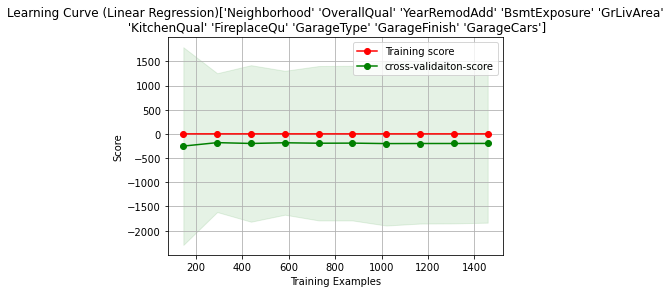

In [44]:
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']

title = 'Learning Curve (Linear Regression)' + str(x.columns.values)

cv = ShuffleSplit(n_splits=100,test_size=2,random_state=0)

estimator=LinearRegression()
plot_learning_curve(estimator,title,x,y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)

plt.show()

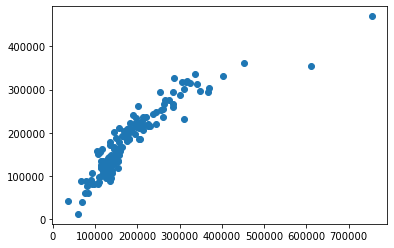

In [45]:
plt.scatter(y_test,y_pred)

In [46]:
import pickle as pkl

filename = 'house-linReg-model.pkl'
pkl.dump(linReg, open(filename, 'wb'))

In [50]:
temp_array = list()

In [51]:
temp_array = [15,7,5,1,1710,2,1,4,2,2]

In [52]:
data = np.array([temp_array])

In [53]:
data

array([[  15,    7,    5,    1, 1710,    2,    1,    4,    2,    2]])

In [54]:
filename = 'house-linReg-model.pkl'
regressor = pkl.load(open(filename, 'rb'))

In [55]:
my_pred = int(regressor.predict( data )[0])

In [56]:
my_pred

211685